# ADS1
Consider, you have a text document as input. Count the number of times a word occurs in the document. Develop a MapReduce framework based on Python threads. The data will be read from a file, stored in-memory and will run on a single computer. 

In [2]:
import threading

# Global dictionary to store word counts
word_counts = {}

# Function to count words in a chunk of text
def count_words(chunk):
    global word_counts
    words = chunk.split()
    for word in words:
        word = word.lower()
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# Function to read file and split into chunks
def read_file(filename):
    with open(filename, 'r') as file:
        data = file.read()
    return data

# Main function for MapReduce
def map_reduce(filename):
    input_text = read_file(filename)

    # Split input text into chunks (for simplicity, we only have one chunk)
    chunks = [input_text]

    # Mapper phase
    for chunk in chunks:
        count_words(chunk)

    # Reducer phase
    print("Word Counts:")
    for word, count in word_counts.items():
        print(f"{word}: {count}")

# Run the MapReduce
filename = r"C:\Users\raksh\Downloads\input.txt" 
map_reduce(filename)


Word Counts:
my: 1
name: 1
is: 3
abc: 3
and: 1
i: 1
am: 1
the: 2
best.: 2
very: 1
fast: 1
in: 1
learning: 1


# ADS3
Model a time series data in order to make predictions using ARIMA. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
<class 'pandas.core.frame.DataFrame'>
(-2.1081222771411996, 0.24126116082883903, 16, 346, {'1%': -3.4493918438232525, '5%': -2.8699298018856574, '10%': -2.5712397066390458}, -2168.693554108702)
p-value: 0.24126116082883903


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


p-value: 0.022059461239126152
                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1096.369
Date:                Fri, 26 Apr 2024   AIC                          -2186.737
Time:                        13:18:06   BIC                          -2175.063
Sample:                             0   HQIC                         -2182.096
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5806      0.050     11.662      0.000       0.483       0.678
ar.L2          0.1687      0.058      2.903      0.004       0.055       0.283
sigma2         0.0001 

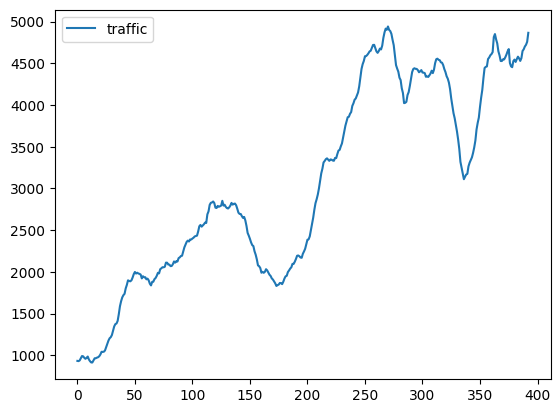

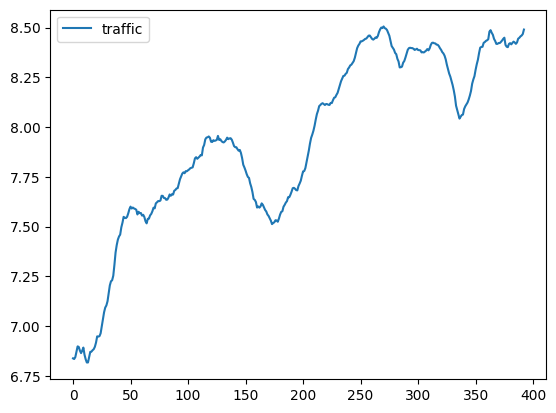

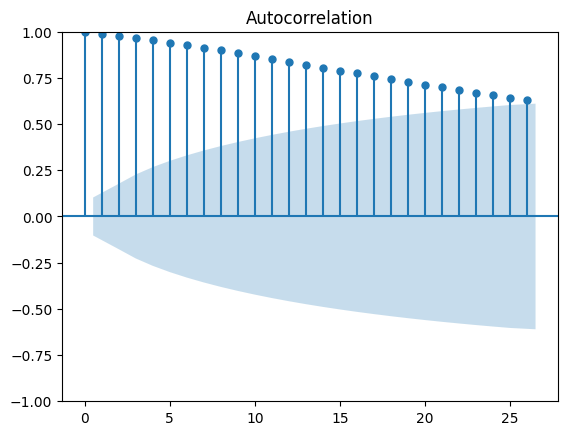

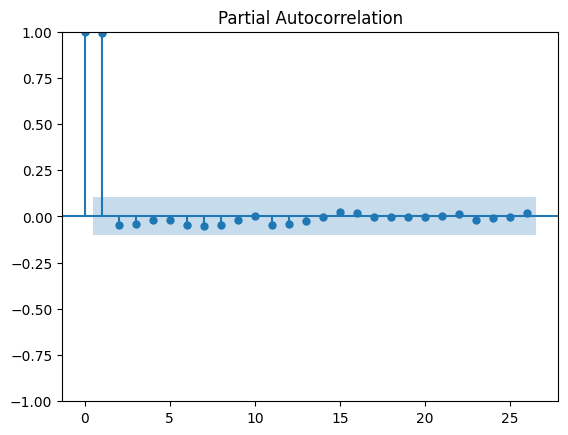

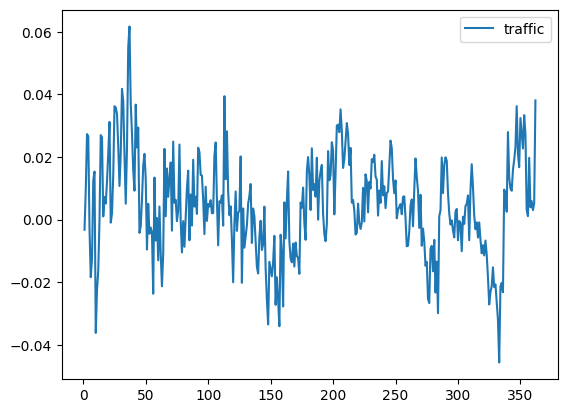

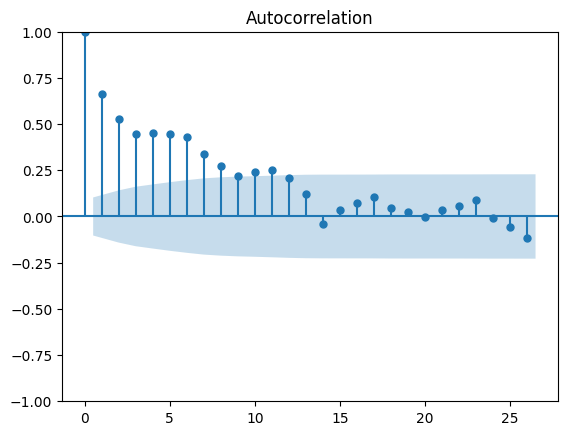

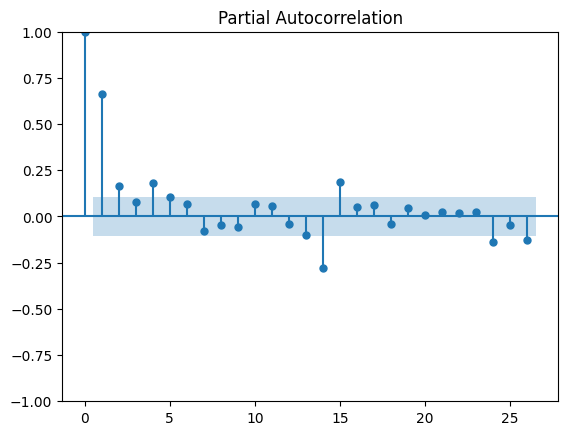

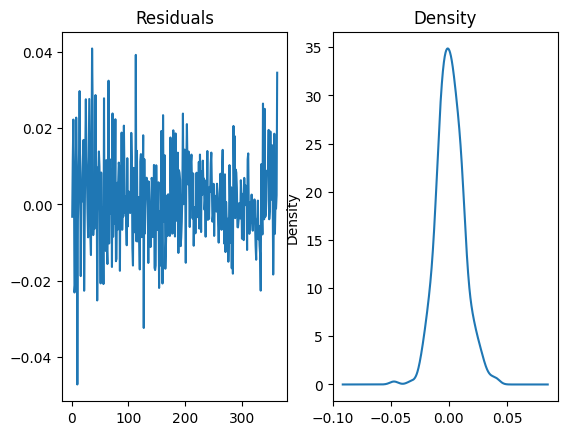

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Axes: >

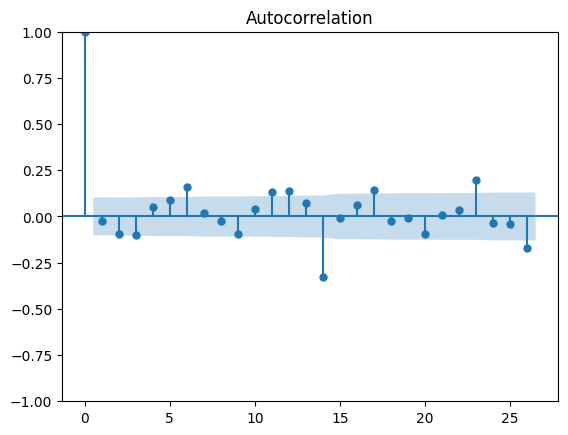

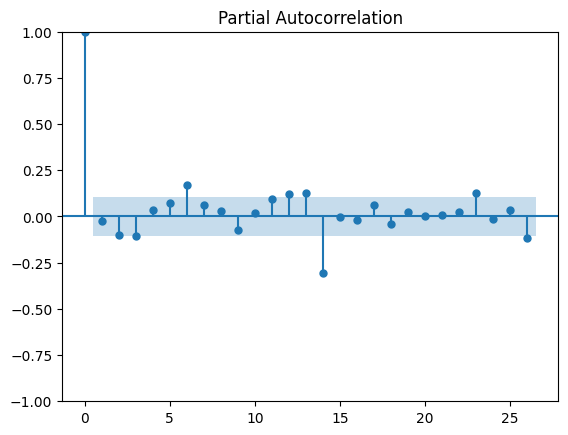

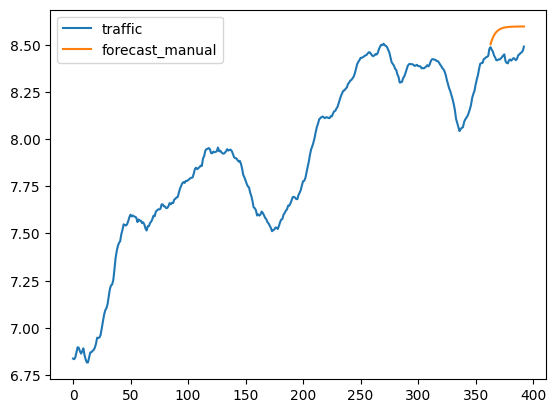

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(r"C:\Users\raksh\Downloads\website_data.csv")
df.info()
df.plot()

#this time series’ variance doesn’t look constant throughout time. 
#transform this series to stabilize its variance. 
df = np.log(df) 
df.plot()

#split the time series into training and test sets
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()
print(type(df_test))

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

#ADF test: Dickey Fuler test
adf_test = adfuller(df_train)
print(adf_test)
print(f'p-value: {adf_test[1]}')

#Transform to stationary: differencing
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

#ADF test
adf_test = adfuller(df_train_diff)
#print(df_test)
print(f'p-value: {adf_test[1]}')

#Fit the ARIMA model
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

#Make time series predictions
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot()


# ADS5

Write a Python program that performs sentiment analysis on a given text using Natural Language Processing techniques.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

data = pd.read_csv(r"C:\Users\raksh\Downloads\Finance_Sentiment.csv")

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer=None)
text_counts = cv.fit_transform(data['Sentence'])
text_counts


<5842x11126 sparse matrix of type '<class 'numpy.int64'>'
	with 65768 stored elements in Compressed Sparse Row format>

In [3]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], 
                                                    test_size=0.25, random_state=5)

In [4]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [5]:
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.6878850102669405


# ADS6 
Write a Python program that performs social network analysis on any social network dataset. 
Your program should utilize the NetworkX library to analyze the network properties and provide insights about the network structure.

In [6]:
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

In [8]:
#Read nodes and edges datasets
nodes = pd.read_csv(r"C:\Users\raksh\Downloads\InputFileNodes.csv")
edges = pd.read_csv(r"C:\Users\raksh\Downloads\InputFileEdges.csv")

In [11]:
nodes.head()


,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


In [10]:
edges.head()

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [14]:
#Create undirected graph using edgelist
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True)
nx.info(G)

C:\Users\raksh\AppData\Local\Temp\ipykernel_1752\2019687604.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 17 nodes and 38 edges'

In [15]:
#Create directed graph using edgelist
G_directed = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.DiGraph)
nx.info(G_directed)            

C:\Users\raksh\AppData\Local\Temp\ipykernel_1752\442061989.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_directed)


'DiGraph with 17 nodes and 48 edges'

In [17]:
G.nodes()

NodeView(('s01', 's02', 's03', 's04', 's11', 's05', 's15', 's06', 's17', 's08', 's09', 's16', 's10', 's07', 's12', 's13', 's14'))

In [18]:
G.edges.data()

EdgeDataView([('s01', 's02', {'weight': 23, 'type': 'hyperlink'}), ('s01', 's03', {'weight': 21, 'type': 'hyperlink'}), ('s01', 's04', {'weight': 21, 'type': 'hyperlink'}), ('s01', 's15', {'weight': 11, 'type': 'hyperlink'}), ('s01', 's05', {'weight': 1, 'type': 'mention'}), ('s02', 's05', {'weight': 21, 'type': 'hyperlink'}), ('s02', 's03', {'weight': 21, 'type': 'hyperlink'}), ('s02', 's10', {'weight': 5, 'type': 'hyperlink'}), ('s02', 's09', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's04', {'weight': 23, 'type': 'hyperlink'}), ('s03', 's12', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's10', {'weight': 2, 'type': 'mention'}), ('s03', 's11', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's08', {'weight': 4, 'type': 'hyperlink'}), ('s03', 's05', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's07', {'weight': 1, 'type': 'mention'}), ('s04', 's11', {'weight': 22, 'type': 'mention'}), ('s04', 's06', {'weight': 1, 'type': 'mention'}), ('s04', 's12', {'weight': 3, 'type': 'hyperlink'}), 

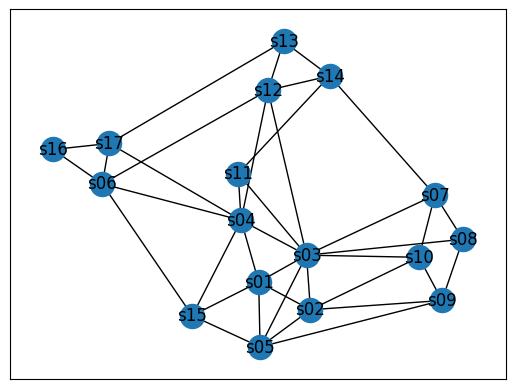

In [21]:
nx.draw_networkx(G)

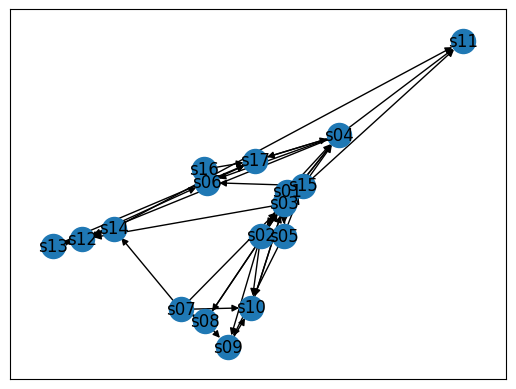

In [22]:
nx.draw_networkx(G_directed)

In [23]:
G.degree('s03')

9

(array([1., 0., 3., 2., 7., 0., 0., 0., 1., 3.]),
 array([24. , 29.3, 34.6, 39.9, 45.2, 50.5, 55.8, 61.1, 66.4, 71.7, 77. ]),
 <BarContainer object of 10 artists>)

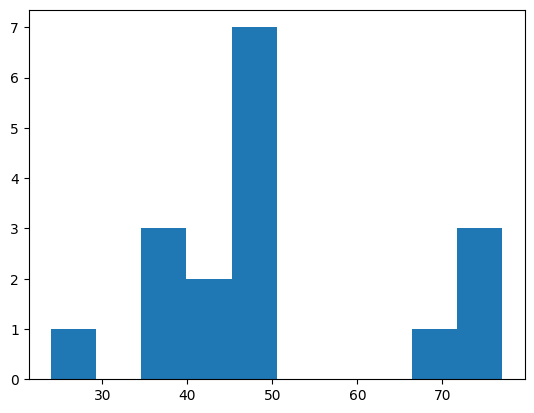

In [24]:
#Degree plot for undirected and weighted graph
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

In [25]:
#Degree centrality for unweighted graph
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'s01': 0.3125,
 's02': 0.3125,
 's03': 0.5625,
 's04': 0.4375,
 's11': 0.1875,
 's05': 0.3125,
 's15': 0.25,
 's06': 0.3125,
 's17': 0.25,
 's08': 0.1875,
 's09': 0.25,
 's16': 0.125,
 's10': 0.25,
 's07': 0.25,
 's12': 0.3125,
 's13': 0.1875,
 's14': 0.25}

In [26]:
#Undirected and unweigted graph
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'s01': 0.5333333333333333,
 's02': 0.48484848484848486,
 's03': 0.6666666666666666,
 's04': 0.6153846153846154,
 's11': 0.5161290322580645,
 's05': 0.5161290322580645,
 's15': 0.48484848484848486,
 's06': 0.5,
 's17': 0.45714285714285713,
 's08': 0.45714285714285713,
 's09': 0.41025641025641024,
 's16': 0.35555555555555557,
 's10': 0.47058823529411764,
 's07': 0.48484848484848486,
 's12': 0.5714285714285714,
 's13': 0.43243243243243246,
 's14': 0.47058823529411764}

In [28]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'s01': 0.0391468253968254,
 's02': 0.025992063492063493,
 's03': 0.3404166666666667,
 's04': 0.19566468253968253,
 's11': 0.017916666666666664,
 's05': 0.0654563492063492,
 's15': 0.05621031746031746,
 's06': 0.10018849206349206,
 's17': 0.05293650793650794,
 's08': 0.019593253968253968,
 's09': 0.01736111111111111,
 's16': 0.0,
 's10': 0.025843253968253963,
 's07': 0.050277777777777775,
 's12': 0.12271825396825396,
 's13': 0.02111111111111111,
 's14': 0.04916666666666667}

In [29]:
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')
betweenness_centrality_weighted 

{'s01': 0.0,
 's02': 0.0,
 's03': 0.7583333333333333,
 's04': 0.325,
 's11': 0.125,
 's05': 0.3333333333333333,
 's15': 0.0,
 's06': 0.2916666666666667,
 's17': 0.125,
 's08': 0.0,
 's09': 0.11666666666666667,
 's16': 0.0,
 's10': 0.0,
 's07': 0.0,
 's12': 0.5,
 's13': 0.0,
 's14': 0.0}

In [30]:
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_centrality 

{'s01': 0.3191408683729161,
 's02': 0.2910340882293079,
 's03': 0.4485472979675353,
 's04': 0.35283346117368625,
 's11': 0.18692750129523708,
 's05': 0.29255252705287443,
 's15': 0.2313025152818496,
 's06': 0.20688820586442144,
 's17': 0.1452821366686579,
 's08': 0.16462950341222413,
 's09': 0.1915922923064456,
 's16': 0.06953859174549203,
 's10': 0.22209545169996198,
 's07': 0.19361886199342868,
 's12': 0.248809538829334,
 's13': 0.1065065446362404,
 's14': 0.14530038460965822}

In [31]:
#Eigenvector centrality for unweighted and directed graph
nx.eigenvector_centrality(G_directed)


{'s01': 0.2773170825083437,
 's02': 0.13847427862061307,
 's03': 0.41775926825782844,
 's04': 0.38154156333060585,
 's11': 0.306390251298658,
 's05': 0.13896529671829147,
 's15': 0.13847427862061307,
 's06': 0.31198807907880677,
 's17': 0.31344906422072144,
 's08': 0.15625535832806653,
 's09': 0.14426643396400213,
 's16': 0.10377990015762116,
 's10': 0.2503078024377427,
 's07': 0.05197751511419699,
 's12': 0.31411333052374907,
 's13': 0.14499530796593255,
 's14': 0.1217772792430166}

In [32]:
#Eigenvector centrality for weighted and directed graph
nx.eigenvector_centrality(G_directed, weight='weight')

{'s01': 0.4231761108958662,
 's02': 0.12866651183030994,
 's03': 0.590353883526169,
 's04': 0.5349942616250454,
 's11': 0.29709333976829955,
 's05': 0.014132153765442915,
 's15': 0.20970796030691338,
 's06': 0.0513553213916974,
 's17': 0.06613729992654517,
 's08': 0.07688339120470367,
 's09': 0.02584231231049694,
 's16': 0.025817036918547538,
 's10': 0.07608535328256444,
 's07': 0.0386498600606086,
 's12': 0.088835295665698,
 's13': 0.07216873997419725,
 's14': 0.050487621655426904}

# Additional program 1
Time series data analysis


         date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


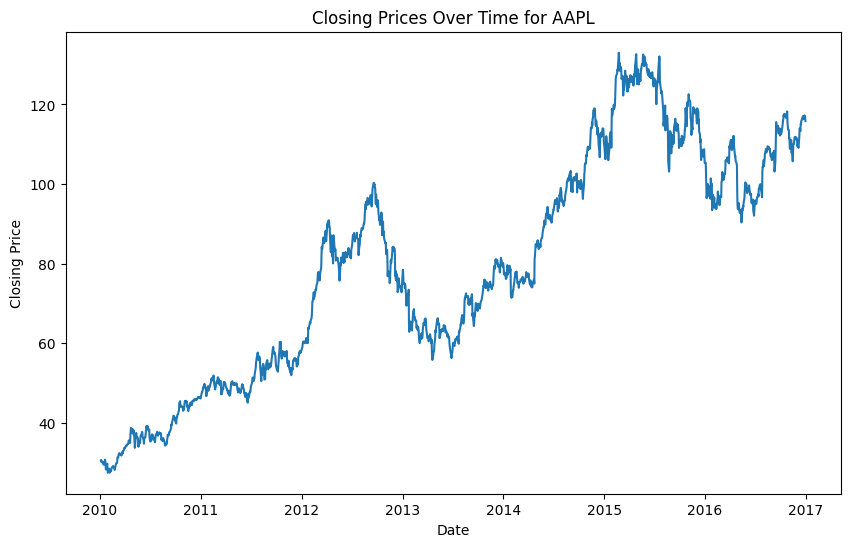

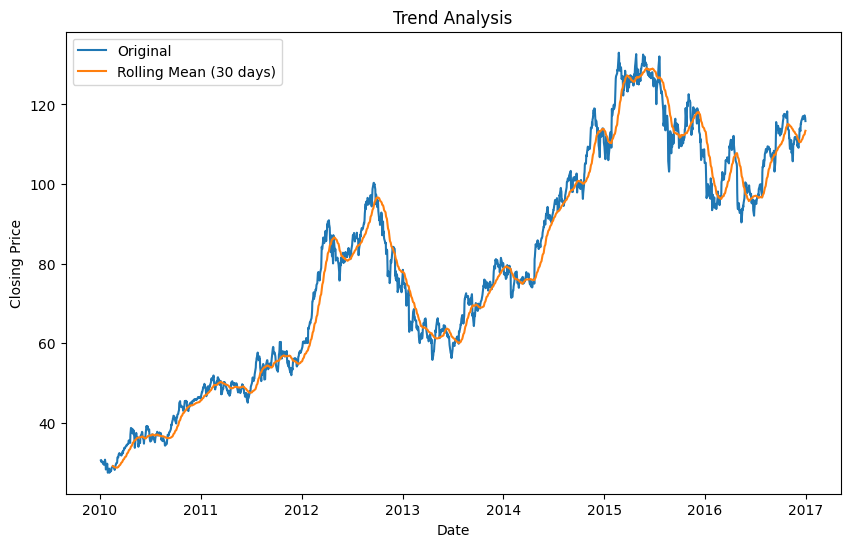

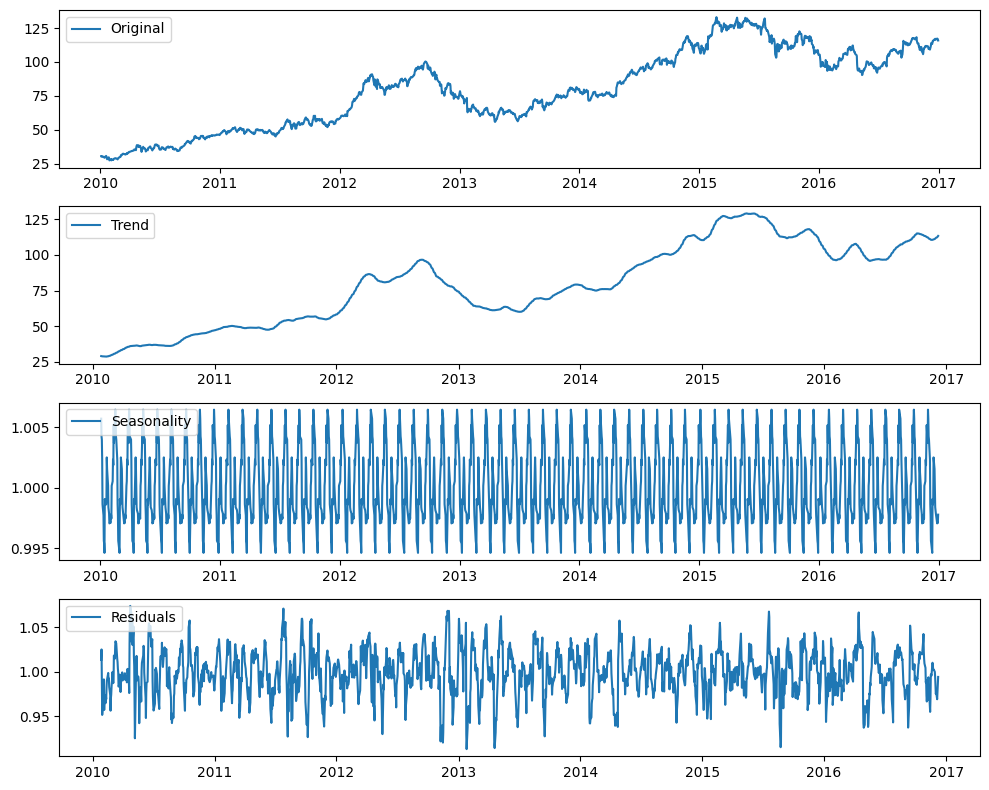

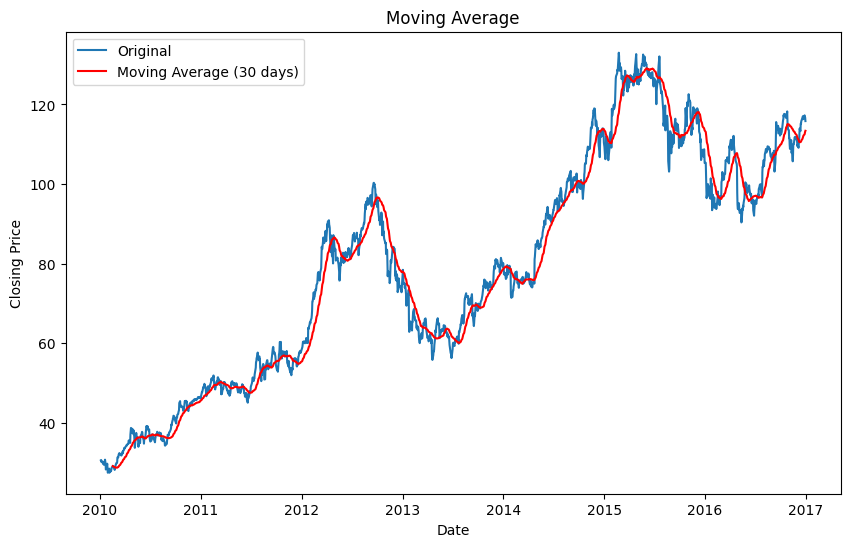

Results of Dickey-Fuller Test:
Test Statistic                   -1.324458
p-value                           0.617910
#Lags Used                        0.000000
Number of Observations Used    1761.000000
Critical Value (1%)              -3.434069
Critical Value (5%)              -2.863183
Critical Value (10%)             -2.567645
dtype: float64


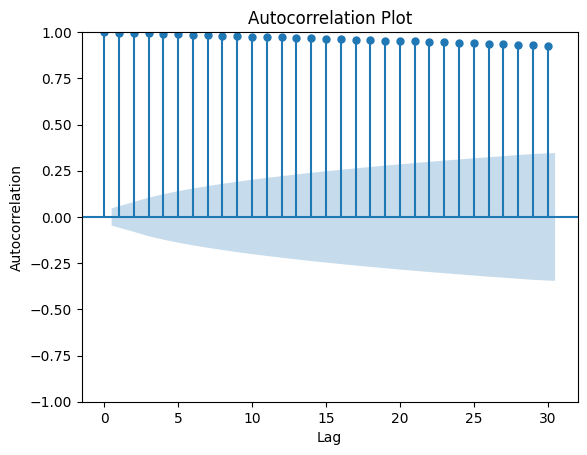

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv(r"C:\Users\raksh\Downloads\prices-split-adjusted.csv")
print(data.head())

# Remove missing data
data.dropna(inplace=True)

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as index
data.set_index('date', inplace=True)

# Select a specific symbol
symbol = 'AAPL'  # Example: Apple Inc.
ts_data = data[data['symbol'] == symbol]['close']

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(ts_data)
plt.title('Closing Prices Over Time for {}'.format(symbol))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Trend analysis (rolling mean)
rolling_mean = ts_data.rolling(window=30).mean()
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Seasonality detection (seasonal decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_data, model='multiplicative', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(ts_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Moving average
window = 30
moving_avg = ts_data.rolling(window=window).mean()

plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Original')
plt.plot(moving_avg, color='red', label='Moving Average ({} days)'.format(window))
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Stationarity check (Dickey-Fuller test)
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

adf_test(ts_data)

# Autocorrelation analysis
plot_acf(ts_data, lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()



# Additional problem 2:
Problem Statement: Representing text as numerical data.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
simple_train = ['call you tonight', 'Call me a cab', 'please call me.. please']
vect = CountVectorizer()

# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train )

vect.get_feature_names_out()

# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

# examine the vocabulary and document-term matrix together
# pd.DataFrame(matrix, columns=columns)
import pandas as pd
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

# check the type of the document-term matrix
type(simple_train_dtm)

# examine the sparse matrix contents
# left: coordinates of non-zero values
# right: values at that point
# CountVectorizer() will output a sparse matrix
print('sparse matrix')
print(simple_train_dtm)
print("In Matrix format\n", simple_train_dtm.toarray())

# example text for model testing
#In order to make a prediction, 
#the new observation must have the same features as the training observations, both in number and meaning.
simple_test = ['Please don\'t call me']

# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

sparse matrix
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2
In Matrix format
 [[0 1 0 0 1 1]
 [1 1 1 0 0 0]
 [0 1 1 2 0 0]]


,cab,call,me,please,tonight,you
0,0,1,1,1,0,0
